In [128]:
# cell 1
from typing import List, Tuple
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

### **Loading the Housing Price Prediction Dataset**

* Using housing price prediction dataset, we will be training the multivairate linear regression model to predict the price of house based on house features like area, number of bedrooms, number of stories etc.

**Load the dataset using pandas**

In [16]:
# cell 2
df = pd.read_csv("../data/housing_price_prediction.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


Here, we could see the dataset consists both numeric and categorical features.

**Study the data statistics**

In [17]:
# cell 3
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


Here, we could see the maximum and minimum value of different features are of different range.

**Check for missing values**

In [18]:
# cell 4
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


Here we could see there are no missing values in all feature columns as 545 out of 545 are non-null.

**Converting the categorical features into numeric features**

In [64]:
# cell 5
df = pd.get_dummies(df, drop_first=True)
df.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False


**Separating the Input features and output target variable**

In [69]:
# cell 6
# All the columns except 'price' are our input features
X = df.drop('price', axis=1).values  # X is our feature matrix and axis=1 means columns

# 'price' is our target variable
y = df['price'].values  # y is our label/target/ground_truth vector

In [70]:
# cell 7
print(f"Dimension of feature matrix: {X.shape}")
print(f"Dimension of label vector: {y.shape}")

Dimension of feature matrix: (545, 13)
Dimension of label vector: (545,)


Here, we could see there are 545 total examples in dataset and we will be using 13 different features.We should reshape the label vector to pervent matrix dimensional confict.

**Reshaping the label vector**

In [71]:
# cell 8
y = y.reshape(-1, 1)  # -1 will tell numpy to infer the number of rows automatically and we have specified column as 1
print(f"Dimension of label vector: {y.shape}")

Dimension of label vector: (545, 1)


**Splitting the entire dataset into train, validation and test sets**

* We will randomly split our dataset both X and y into train, validation and test sets in the proportion of 60:20:20 respectively.

* For this we will use train_test_split() function from sklearn library.

* We will achieve this task in two steps:

    a. First split the entire dataset into train and validation set in the ratio 60:40.  
    
    b. Then, split the validation set into validation set and test set in the ratio 50:50

In [72]:
# cell 9
# a. Splitting the data into train, and validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, random_state=42)

# b. Splitting the validation set into validation and test set
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

In [73]:
# cell 10
print(f"Dimension of training feature matrix: {X_train.shape}")
print(f"Dimension of training label vector: {y_train.shape}")
print("=" * 50)
print(f"Dimension of validation feature matrix: {X_val.shape}")
print(f"Dimension of validation label vector: {y_val.shape}")
print("=" * 50)
print(f"Dimension of testing feature matrix: {X_test.shape}")
print(f"Dimension of testing label vector: {y_test.shape}")

Dimension of training feature matrix: (327, 13)
Dimension of training label vector: (327, 1)
Dimension of validation feature matrix: (109, 13)
Dimension of validation label vector: (109, 1)
Dimension of testing feature matrix: (109, 13)
Dimension of testing label vector: (109, 1)


**Feature Scaling**
* Can be done in two ways:

    1. Feature Normalization:
        * Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. 
        
        * It is also known as Min-Max scaling.

        $$
            X_{\text{norm}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}
        
        $$
    2. Feature Standardization
        * Standardization is scaling technique where the values are centered around the mean with a unit standard deviation. 
        
        * This means that the mean of the feature becomes zero, and the resultant distribution has a unit standard deviation.

        $$
            X_{\text{std}} = \frac{X - \mu}{\sigma}
        $$

* For feature scaling we will use **TRAINING SET** to compute X_min, X_max (for normalization) and X_mean and X_std (for standardization).

* Then the same X_min, X_max, X_mean or X_std values from training sets are used for scaling features from validation and test sets.

* We will use feature standardization in this tutorial.

In [106]:
# cell 11
# Function to standardize training features
def training_feature_standardization(X_train):
    # Calculate mean and standard deviation from the training set
    X_train_mean = X_train.mean(axis=0)  # axis=0 means columnwise operation
    X_train_std = X_train.astype(np.float32).std(axis=0)
    
    # Reshaping the mean and standard deviation
    X_train_mean = X_train_mean.reshape(1, -1)
    X_train_std = X_train_std.reshape(1, -1)
    
    # Standardize training set
    X_train_scaled = (X_train - X_train_mean) / X_train_std
    
    return X_train_mean, X_train_std, X_train_scaled

In [107]:
# cell 12
# Function to standardize the test features
# This same function can be used to standardize the validation sets
def test_feature_standardization(X_train_mean, X_train_std, X_test):
    
    X_test_scaled = (X_test - X_train_mean) / X_train_std
    
    return X_test_scaled

**Building Linear Regression Model**

In [156]:
# cell 13
class LinearRegression:
    
    def __init__(self, X_train_mean, X_train_std, learning_rate=0.001, n_iters=1000):
        self.X_train_mean = X_train_mean
        self.X_train_std = X_train_std
        self.theta = None
        self.n_iters = n_iters
        self.learning_rate = learning_rate
        
        # Containers for losses and theta
        self.loss_history = []
        self.theta_history = []
        
        
    def compute_MSE_loss(self, y: np.ndarray, y_pred: np.ndarray) -> float:
        """
        Function to compute Mean Squared Error

        Args:
            y (np.ndarray): Label vector of shape (m, 1)
            y_pred (np.ndarray): Predicted label vector of shape (m, 1)

        Returns:
            float: Loss value
        """
        m = len(y) # m = y.shape[0] i.e. number of samples
        loss = np.sum((y_pred - y) ** 2) / (2 * m)
        return loss
    
    def gradient_descent(self, X: np.ndarray, y: np.ndarray, y_pred: np.ndarray, theta: np.ndarray) -> np.ndarray:
        """
        Function to calculate gradients and update parameters

        Args:
            X (np.ndarray): Input feature matrix of shape (m, n+1)
            y (np.ndarray): Label vector of shape (m, 1)
            y_pred (np.ndarray): Predicted label vector of shape (m, 1)
            theta (np.ndarray): linear regression model parameter vector of shape (n+1, 1)

        Returns:
            np.ndarray: Updated parameter vector: theta of shape (n+1, 1)
        """
        m = len(y)
        
        # Compute gradients
        # Shape of gradients is (n+1, 1)
        gradients = np.dot(X.T, (y_pred - y)) / m
        
        # Update parameters
        theta = theta - self.learning_rate * gradients
        
        return theta
    
    def fit(self, X: np.ndarray, y: np.ndarray) -> Tuple[List, List]:
        """
        Function to fit linear regression model

        Args:
            X (np.ndarray): Scaled input feature matrix of shape (m, n+1)
            y (np.ndarray): Label vector of shape (m, 1)

        Returns:
            Tuple[List, List]: Returns loss history and theta history
        """
        # Add new dimension to X
        new_dimension = np.ones((X.shape[0], 1))
        X = np.hstack((new_dimension, X))
        
        # Initialize theta
        self.theta = np.zeros((X.shape[1], 1))
        
        # Training loop
        for i in range(self.n_iters):
            self.theta_history.append(self.theta)
            y_pred = np.dot(X, self.theta)
            
            # Compute loss
            loss = self.compute_MSE_loss(y, y_pred)
            self.loss_history.append(loss)
            
            # Perform gradient descent
            self.theta = self.gradient_descent(X, y, y_pred, self.theta)
            
            # Print loss every 100 iterations
            if i % 100 == 0:
                print(f"Iteration {i}: MSE Loss = {loss}")
                print("=" * 50)
                
        return self.loss_history, self.theta_history
    
    def evaluate(self, X: np.ndarray, y: np.ndarray) -> Tuple[float, float]:
        """Function to evaluate trained model on test and validation set

        Args:
            X (np.ndarray): Scaled input feature matrix from test or validation set of shape (test/validation_samples, n+1)
            y (np.ndarray): Label vector from test or validation set of shape (test/validation_samples, 1)

        Returns:
            Tuple[float, float]: Returns MSE loss and Coefficient of Determination (R^2)
        """
        # Add new dimension to X
        new_dimension = np.ones((X.shape[0], 1))
        X = np.hstack((new_dimension, X))
        y_pred = np.dot(X, self.theta)     
        mse_loss = self.compute_MSE_loss(y, y_pred)
        r2 = 1 - (np.sum((y - y_pred) ** 2) / np.sum((y - y.mean()) ** 2))  # coefficient of determination
        return mse_loss, r2
           
    def predict(self, X):
        """Function to predict using trained model on data that are not in the dataset

        Args:
            X (np.ndarray): Scaled input feature matrix of shape (m, n+1)

        Returns:
            np.ndarray: Returns the predicted price of shape (m, 1)
        """
        # Add new dimension to X
        new_dimension = np.ones((X.shape[0], 1))
        X = np.hstack((new_dimension, X))
        y_pred = np.dot(X, self.theta)
        return y_pred
    

**Training Model**

In [157]:
# cell 14
# Prepare training, validation and test sets by standardizing features
X_train_mean, X_train_std, X_train_scaled = training_feature_standardization(X_train)

X_val_scaled = test_feature_standardization(X_train_mean, X_train_std, X_val)

X_test_scaled = test_feature_standardization(X_train_mean, X_train_std, X_test)

# Instantiate LinearRegression Model
lr_model = LinearRegression(X_train_mean=X_train_mean, X_train_std=X_train_std, learning_rate=0.01, n_iters=1000)

# Fit the model with training data
loss_history, theta_history = lr_model.fit(X_train_scaled, y_train)

print(f"Training MSE Loss after completion of training: {loss_history[-1]}")

Iteration 0: MSE Loss = 11898223945387.768
Iteration 100: MSE Loss = 1889850670758.359
Iteration 200: MSE Loss = 646809723532.819
Iteration 300: MSE Loss = 479356963320.85864
Iteration 400: MSE Loss = 456261378050.4726
Iteration 500: MSE Loss = 452895898484.9235
Iteration 600: MSE Loss = 452329929716.92
Iteration 700: MSE Loss = 452203573461.2716
Iteration 800: MSE Loss = 452163907806.7867
Iteration 900: MSE Loss = 452148193954.3902
Training MSE Loss after completion of training: 452141326600.376


**Visualize the Learning Curve**

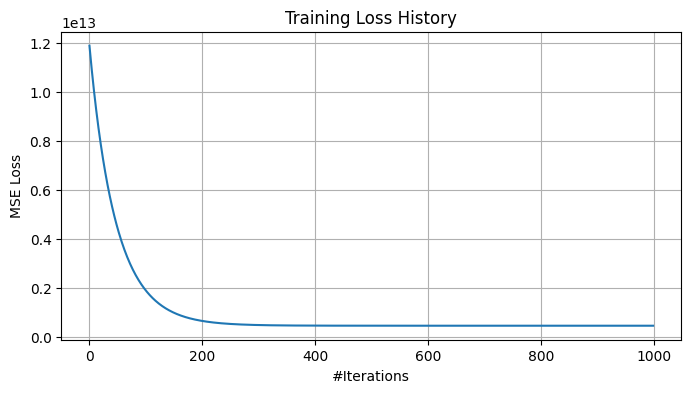

In [158]:
# cell 15
plt.figure(figsize=(8, 4))
sns.lineplot(loss_history)
plt.title("Training Loss History")
plt.xlabel("#Iterations")
plt.ylabel("MSE Loss")
plt.grid()
plt.show()

**Model Evaluation on Validation Set**

In [159]:
# cell 16
# Evaluate the model on validation set
val_loss, val_r2 = lr_model.evaluate(X_val_scaled, y_val)
print(f"Validation Loss: {val_loss}")
print(f"Validation R^2: {val_r2}")

Validation Loss: 749652843046.9702
Validation R^2: 0.6737946158989427


Here we can see that the Validation Loss is higher than Training Loss. R^2 is greater than 0.5 i.e. 0.67 which is just fine but could be improved.

**Model Selection or Hyperparameter Tuning**
* We will tune learning rate in this tutorial using grid search i.e. we will set predefined set of values for learning rate.

* For every learning rate, we will evaluate the model using validation set.

* We will set the number of iterations to 200(can be changed).

In [160]:
# cell 17
# Prepare training, validation and test sets by standardizing features
X_train_mean, X_train_std, X_train_scaled = training_feature_standardization(X_train)

X_val_scaled = test_feature_standardization(X_train_mean, X_train_std, X_val)

X_test_scaled = test_feature_standardization(X_train_mean, X_train_std, X_test)

learning_rate_set = [0.1, 0.01, 0.001, 0.0001]
val_loss_set = []
val_r2_score_set = []
model_list = []

for exp_num, lr in enumerate(learning_rate_set):
    print(f"RUNNING EXPERIMENT {exp_num+1} WITH LEARNING RATE: {lr}")
    my_lr_model = LinearRegression(X_train_mean=X_train_mean, X_train_std=X_train_std, learning_rate=lr, n_iters=200)
    _, _ = my_lr_model.fit(X_train_scaled, y_train)
    loss, r2 = my_lr_model.evaluate(X_val_scaled, y_val)
    val_loss_set.append(loss)
    val_r2_score_set.append(r2)
    model_list.append(my_lr_model)


RUNNING EXPERIMENT 1 WITH LEARNING RATE: 0.1
Iteration 0: MSE Loss = 11898223945387.768
Iteration 100: MSE Loss = 452140524849.5005
RUNNING EXPERIMENT 2 WITH LEARNING RATE: 0.01
Iteration 0: MSE Loss = 11898223945387.768
Iteration 100: MSE Loss = 1889850670758.359
RUNNING EXPERIMENT 3 WITH LEARNING RATE: 0.001
Iteration 0: MSE Loss = 11898223945387.768
Iteration 100: MSE Loss = 9660370619205.281
RUNNING EXPERIMENT 4 WITH LEARNING RATE: 0.0001
Iteration 0: MSE Loss = 11898223945387.768
Iteration 100: MSE Loss = 11649559715022.69


**Study Experiment Results**

In [161]:
# cell 18
print(f"Validation loss for different experiments with lr={learning_rate_set}: {val_loss_set}")
print(f"Validation R^2 for different experiments with lr={learning_rate_set}: {val_r2_score_set}")

Validation loss for different experiments with lr=[0.1, 0.01, 0.001, 0.0001]: [749922359341.2747, 1045256820019.552, 10234978132378.688, 14977840435704.896]
Validation R^2 for different experiments with lr=[0.1, 0.01, 0.001, 0.0001]: [0.6736773380587792, 0.5451649311795328, -3.453668126393434, -5.517486377394201]


The negative value for R^2 indicates that the models does not fit our data i.e. the model fails to understand the data pattern. If you find harder to compare loss due to its high value we could normalize that as follows.

In [162]:
# cell 19
print(f"Validation loss for different experiments with lr={learning_rate_set}: {np.array(val_loss_set)/max(val_loss_set)}")

Validation loss for different experiments with lr=[0.1, 0.01, 0.001, 0.0001]: [0.05006879 0.06978688 0.68334138 1.        ]


Among those four models that we get from four different experiments, the model that is trained with lr=0.1 for 200 epochs yields higher R^2. So, we will select that model.

**Testing Best Model with Test Sets**

In [163]:
# cell 20
best_model = model_list[np.argmax(val_r2_score_set)]  # np.argmax will return the index of max value

loss, r2 = best_model.evaluate(X_test_scaled, y_test)

print(f"Test MSE Loss: {loss}")
print(f"Test R^2 score: {r2}")

Test MSE Loss: 756303346851.1155
Test R^2 score: 0.6742297858400923


**Inferencing model with our own data**

In [164]:
# cell 21
features = df.drop("price", axis=1).columns
print(features)

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad_yes',
       'guestroom_yes', 'basement_yes', 'hotwaterheating_yes',
       'airconditioning_yes', 'prefarea_yes',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')


We have to give all these features as input to the model.

In [165]:
# cell 22
data = np.array((
    100, # area
    2, # no. of bedrooms
    1,  # no. of bathrooms
    1,  # no. of stories
    1,  # parking
    1,  # mainroad_yes
    1,  # guestroom_yes
    0,  # basement_yes
    1,  # hotwaterheating_yes
    0,  # airconditioning_yes
    0,  # prefarea_yes
    1,  # furnishingstatus_semifurnished
    0   # furnishingstatus_unfurnished
))

In [166]:
# cell 23
data = data.reshape(1, -1)
data_scaled = test_feature_standardization(X_train_mean, X_train_std, data)

prediction = best_model.predict(data_scaled)
print(f"Predicted price: {prediction}")

Predicted price: [[3529794.9892266775]]


### **Optional Assignments**

* As we have noticed, our best model has R^2 score of around 0.67 which is not a very good score. Try to improve our model score.

* You could try EDA and do some feature engineering.

* You could add some higher order features or feature interaction.